In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pathpy as pp
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/wake_effect/turbine_distances')
from interaction_matrix import interaction_matrix

In [ ]:
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [ ]:
matrix = interaction_matrix(coord)

In [ ]:
haver_interaction_full = matrix.calculate_haver(tri=False, plot=True)

In [ ]:
haver_interaction_tri = matrix.calculate_haver(True, True)

In [ ]:
euclid_interaction_full_v1 = matrix.calculate_euclidean(threshold=0.004, tri=False, plot=False)
euclid_interaction_full_v2 = matrix.calculate_euclidean(threshold=0.003, tri=False, plot=False)
euclid_interaction_full_v3 = matrix.calculate_euclidean(threshold=0.0035, tri=False, plot=False)

In [ ]:
euclid_interaction_tri_v1 = matrix.calculate_euclidean(threshold=0.004, tri=True, plot=False)
euclid_interaction_tri_v2 = matrix.calculate_euclidean(threshold=0.003, tri=True, plot=False)
euclid_interaction_tri_v3 = matrix.calculate_euclidean(threshold=0.0035, tri=True, plot=False)

## Building the Network

if 1 then .add_edge between the two nodes (turbines) else nothing

In [ ]:
def build_network(interaction, directed=bool):
    
    graph = pp.Network(directed=directed)
    
    cnt = 0
    for row in range(0, 33):
        for turb1 in interaction.iloc[[row]].index:
            for int, adj_turb in zip(interaction.values[row], interaction.columns):
                cnt += 1
                if int == 1:
                    graph.add_edge(turb1, adj_turb)
                else:
                    pass

    print(cnt)
    return graph

In [ ]:
haver_full = build_network(haver_interaction_full, True)
haver_tri = build_network(haver_interaction_tri, True)

In [ ]:
haver_tri

In [ ]:
haver_full

In [ ]:
euclid_full_v1 = build_network(euclid_interaction_full_v1, True)
euclid_tri_v1 = build_network(euclid_interaction_tri_v1, True)

In [ ]:
euclid_full_v2 = build_network(euclid_interaction_full_v2, True)
euclid_tri_v2 = build_network(euclid_interaction_tri_v2, True)

In [ ]:
euclid_full_v3 = build_network(euclid_interaction_full_v3, True)
euclid_tri_v3 = build_network(euclid_interaction_tri_v3, True)

In [38]:
euclid_tri_v3

## Centrality Measures

 - Degree centrality: How many edges does a node have?
    - A node is central if it has a high degree 
    - Out degree, in-degree, or the sum of both
 - Closeness centrality: Indicates how close a node is to all other nodes in the network
    - Calculated as the average of the shortest path length from the node to every other node in the network

In [ ]:
def centrality_measures(graph):
    # Calculates betweeness centrality of all nodes
    betweenness = pp.algorithms.centralities.betweenness(graph)
    # Calculates degree centrality of all nodes
    degree = pp.algorithms.centralities.degree(graph)
    # Calculates closeness centrality of all nodes
    closeness = pp.algorithms.centralities.closeness(graph)
    # . . .
    distance_matrix = pp.algorithms.centralities.distance_matrix(graph)
    # . . .
    #rank_centrality = pp.algorithms.centralities.rank_centralities(graph)

    return betweenness, degree, closeness, distance_matrix

In [ ]:
def plotter(measure, name):

    df = pd.DataFrame.from_dict(
        measure, orient='index', columns=['measure'])
    
    plt.figure(figsize=(14, 7))
    plt.title(name)
    sns.barplot(x=df.index, y=df.measure, palette='deep')
    plt.xticks(rotation=45)
    plt.xlabel('Turbine')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v1)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

In [ ]:
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='indegree')}")
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='outdegree')}")

2022-01-14 16:48:49 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-14 16:48:49 [Severity.INFO]	Calculating closeness in network ...
2022-01-14 16:48:49 [Severity.INFO]	finished.


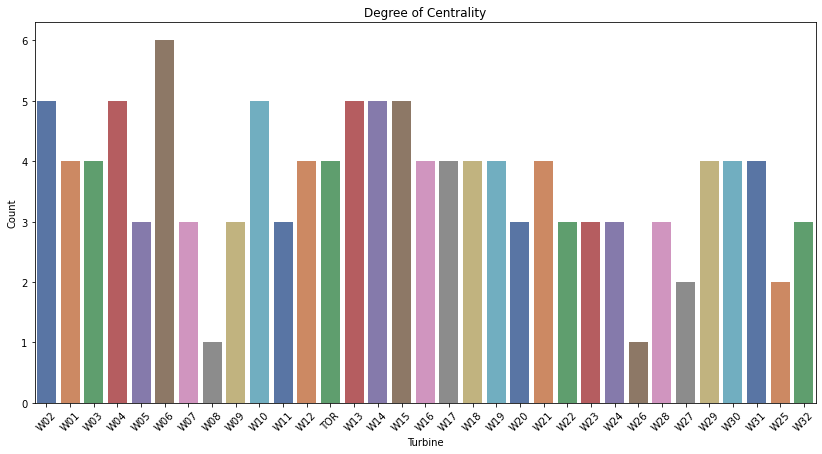

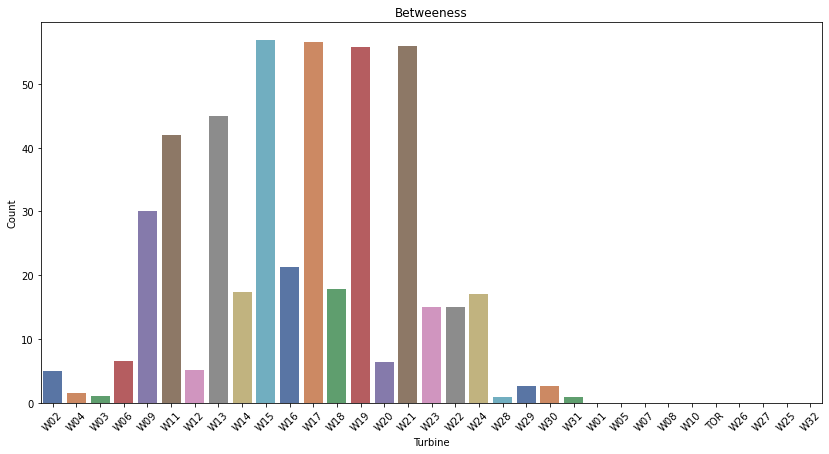

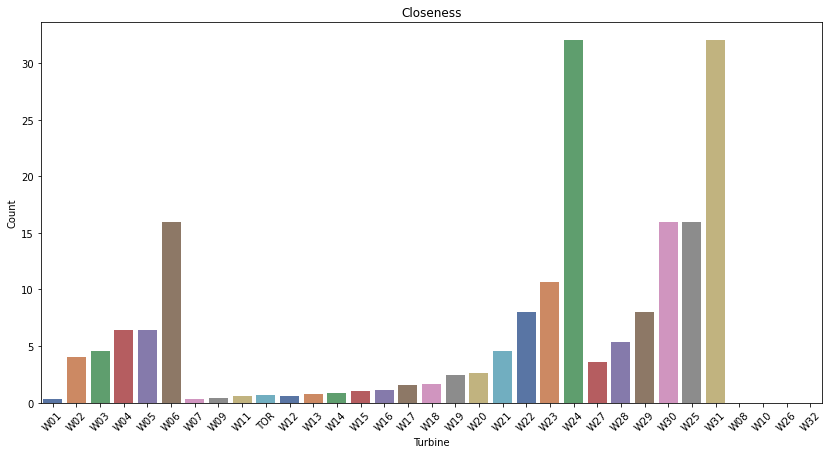

In [39]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v2)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

In [ ]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_full_v2)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

In [ ]:
# Haversine Distances
betweenness_h, degree_h, closeness_h, distance_matrix_h = centrality_measures(haver_full)

In [ ]:
print(f"Avg degree: {pp.statistics.mean_degree(haver_graph, degree='indegree')}")

In [ ]:
plotter(betweenness_h, 'Betweeness')

In [ ]:
plotter(degree_h, 'Degree of Centrality')

In [ ]:
plotter(closeness_h, 'Closeness')